#### Montando o Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Neste notebook vai ser usado para realizar o treino e teste do modelo Naive Bayes (BernoulliNB)

### Importação do modelo ML e treino com os previsores e classes.

In [11]:
import pickle
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

naive_bayes_census = BernoulliNB()

Carregando o arquivo que contém as variáveis com os previsores e classes, tanto para treino quanto para teste.

In [3]:
caminho = '/content/drive/MyDrive/Colab Notebooks/Census/census.pkl'
with open(caminho,'rb') as f:
  x_train,y_train,x_test,y_test = pickle.load(f)

In [4]:
x_train.shape,y_train.shape

((27676, 108), (27676,))

In [5]:
x_test.shape,y_test.shape

((4885, 108), (4885,))

Passando o valores para o treinamento do modelo e em seguida já fazendo a previsão com o dados de teste.

In [6]:
naive_bayes_census.fit(x_train,y_train)

BernoulliNB()

In [7]:
previsao = naive_bayes_census.predict(x_test)

# Verificação de aprendizado

Mostrando a previsão e o gabarito para fazer uma primeira análise.

In [19]:
previsao, y_test

(array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype=object))

A partir daqui temos dados mais preciso para verificar o resultado da previsão, começando com a acurácia e logo após a matrix de confusão.

In [17]:
print(f'Acurácia:',accuracy_score(previsao,y_test)) #78%

Acurácia: 0.7805527123848516


***Para melhor entedimento, temos o eixo Y como a classe verdadeira e no eixo X temos a classe que o modelo determinou.***

0.7805527123848516

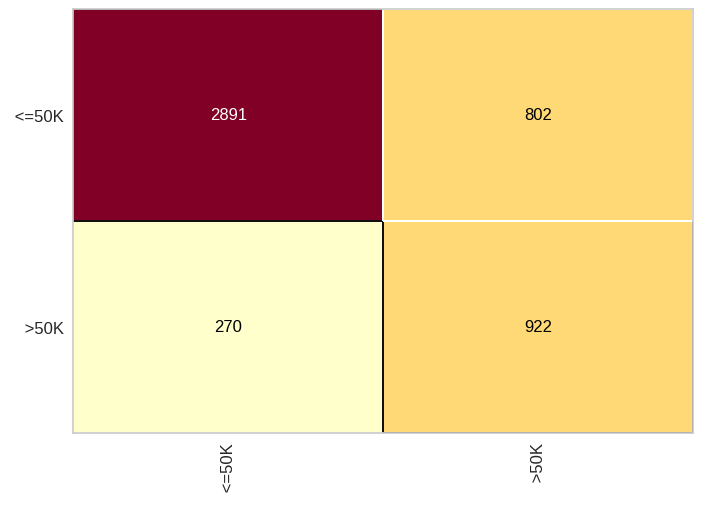

In [18]:
cm = ConfusionMatrix(naive_bayes_census)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)


Podemos ver que teve uma acerto muito bom na classe "<=50" e na ">50" também.

***Para melhor entedimento, vamos análisar o precision (precisão) e recall (% do quanto o modelo reconhece a classe)***


In [14]:
print(classification_report(previsao,y_test))

              precision    recall  f1-score   support

       <=50K       0.78      0.91      0.84      3161
        >50K       0.77      0.53      0.63      1724

    accuracy                           0.78      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.78      0.78      0.77      4885



Partindo para uma análise mais númerica, temos que a precisão do modelo tanto na classe "<=50" quanto na ">50" ficaram acima de 70%.
 Porém o que está baixo é o recall (reconhecimento) da classe ">50"

# Conclusão

Após feito as análises tanto para distribuição gaussiana quanto para bernoulliana, foi concluído que para este DF, DataFrame, é melhor utilizar a distribuição bernoulliana.

Porém é capaz de chegarmos as 70% de precisão com Guassiana, para isso precisamos retirar o escalonamento e o one hot encoding.
